# Machine Learning com Naïve Bayes

## Implementação from scratch...

In [70]:
import csv
import random
import math
from IPython.display import Image

def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [str(x).split(':')[1] == 'True' for x in dataset[i]]
    return dataset
 
def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]
 
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated
 
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)
 
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries
 
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries
 
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
 
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel
 
def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions
 
def getAccuracy(testSet, predictions):
	correct = 0
	for i in range(len(testSet)):
		if testSet[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0


def run():
    data = loadCsv('./Sampling/samples.csv')
    splitRatio = 0.7
    train, test = splitDataset(data, splitRatio)
#     c = [x[3] for x in train] # traz tudo da classe
    dataset = [[1,20,False], [2,21,True], [3,22,False]]
    summaries = summarizeByClass(train)
    predictions = getPredictions(summaries, test)
    accuracy = getAccuracy(test, predictions)
    print('Accuracy: {0}%'.format(accuracy))
    
#     print('Split {0} rows into train={1} and test={2} rows'.format(len(data), len(train), len(test)))
    
    
run()

Accuracy: 78.66666666666666%


### Dataset: Pima Indians Diabetes Database
**Pregnancies:** Number of times pregnant  
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
**BloodPressure:** Diastolic blood pressure (mm Hg)  
**SkinThickness:** Triceps skin fold thickness (mm)  
**Insulin:** 2-Hour serum insulin (mu U/ml)  
**BMI:** Body mass index (weight in kg/(height in m)^2)  
**DiabetesPedigreeFunction:** Diabetes pedigree function  
**Age:** Age (years)  
**Outcome:** Class variable (0 or 1)  

### Leitura...

In [14]:
filename = './data/diabetes.csv'
splitRatio = 0.67
dataset = loadCsv(filename)
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))

Split 768 rows into train=514 and test=254 rows


### Aprendizado das probabilidades...
Para cada classe, média e desvio padrão para cada atributo.  
Isso é usado para calcular a probabilidade de um novo exemplo (vetor de atributos) com classe desconhecida pertencer a cada uma das classes.

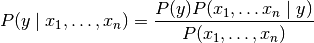

In [16]:
Image(filename='./img/eq1.png', width=300)

In [17]:
Image(filename='./img/eq2.png', width=300)

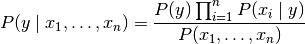

In [18]:
Image(filename='./img/eq3.png', width=300)

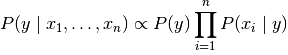

In [19]:
Image(filename='./img/eq4.png', width=300)

#### Gaussian Naive Bayes¶

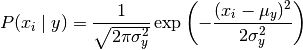

In [20]:
Image(filename='./img/eq6.png', width=300)

In [3]:
summaries = summarizeByClass(trainingSet)
print('Summary by class value: {0}'.format(summaries))

Summary by class value: {1.0: [(4.557471264367816, 3.6086963743561027), (141.72413793103448, 29.652199581211278), (70.98850574712644, 20.32993422271618), (22.46551724137931, 16.81440565682257), (103.48850574712644, 137.58031762484896), (35.51379310344828, 7.458147926952039), (0.5564022988505741, 0.38831573351645027), (36.724137931034484, 10.978370384741282)], 0.0: [(3.2941176470588234, 2.966175211336718), (109.95294117647059, 25.299809778035677), (68.99411764705883, 17.343483660235183), (19.520588235294117, 14.976368393987514), (66.75882352941177, 96.55609926564176), (30.321470588235314, 7.584103322062688), (0.4372735294117648, 0.2963784929725014), (31.355882352941176, 12.086943909999068)]}


### Fazendo uma predição...
Calcular a probabilidade de um dado exemplo pertencer a cada uma das classes...e, assim, identificar a classe com maior probabilidade.

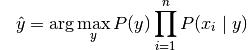

In [22]:
Image(filename='./img/eq5.png', width=300)

In [12]:
inputVector = [9,0,64,0,0,24,0.670,25,'?']
result = predict(summaries, inputVector)
print('Prediction: {0}'.format(result)) 

Prediction: 0.0


### Predições para todos os exemplos do conjunto de treinamento...

In [8]:
predictions = getPredictions(summaries, testSet) 

### Calcular a acurácia do modelo treinado...
As classes identificadas são comparadas com as reais e a acurácia do modelo é então calculada: [0%, 100%].

In [13]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: {0}%'.format(accuracy))

Accuracy: 74.01574803149606%


## Implementação com scikit-learn...

#### Dataset = Iris

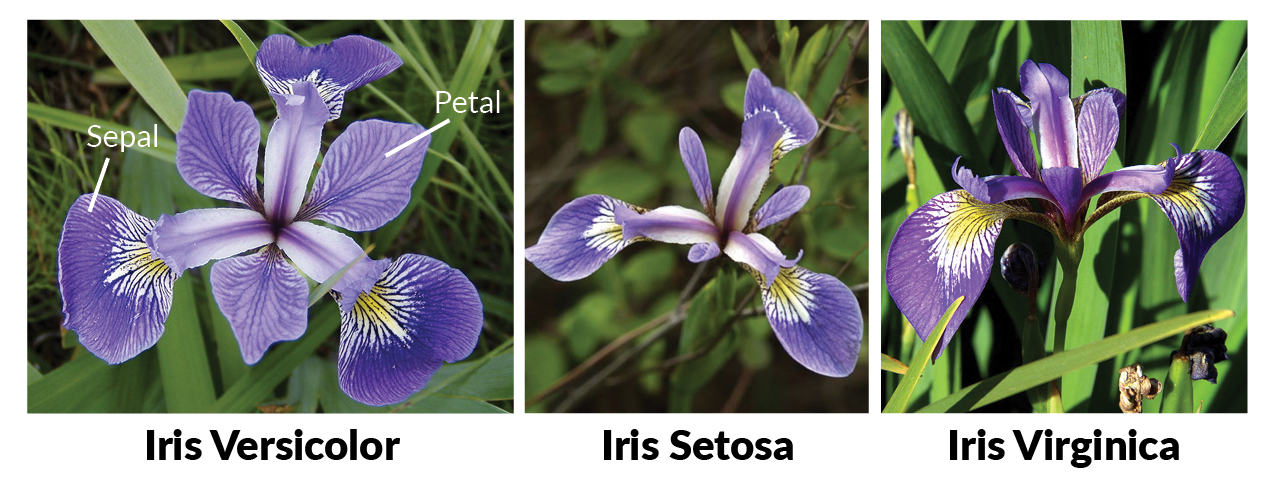

In [26]:
Image(filename='./img/iris.png', width=300)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

plot_decision_regions(X, y,classifier=gnb)#, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()